In [202]:
from sklearn import *
from sklearn.preprocessing import *
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Understanding the data

In [203]:
# dataframe = pd.read_csv('math_outputs.csv').drop(['Unnamed: 0'], axis='columns')
dataframe = pd.read_csv('kmeans_output.csv').drop(['Unnamed: 0'], axis='columns')

/tmp/ipykernel_8983/3492911729.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.corr(method="pearson")
/tmp/ipykernel_8983/3492911729.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(method="pearson"), annot=True, fmt=".2f", cmap='Purples')


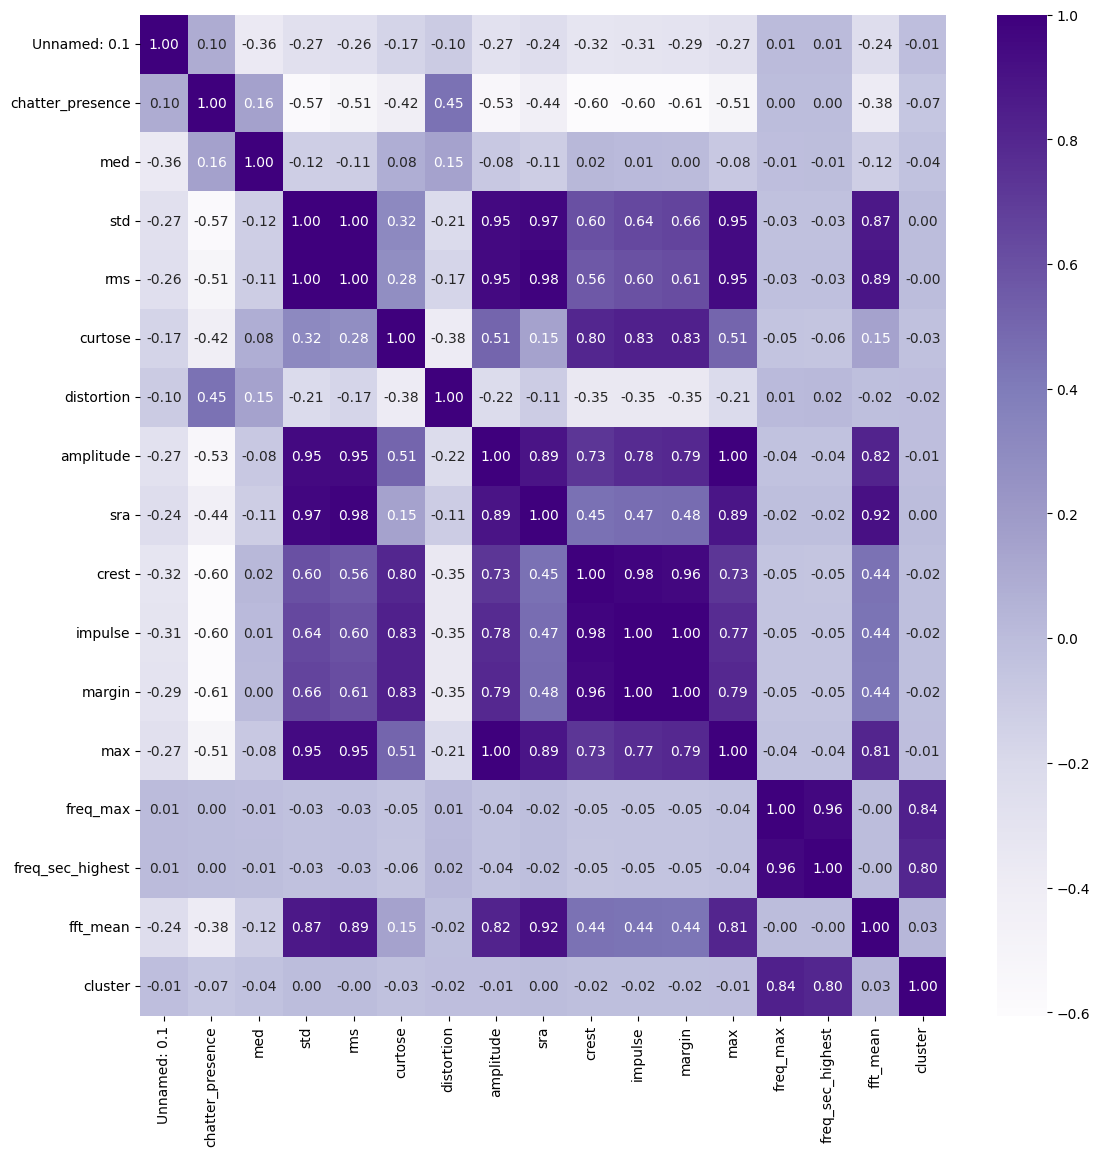

In [204]:
dataframe.corr(method="pearson")

plt.figure(figsize=(13,13))
sns.heatmap(dataframe.corr(method="pearson"), annot=True, fmt=".2f", cmap='Purples')
plt.show()

<AxesSubplot: xlabel='chatter_presence', ylabel='freq_sec_highest'>

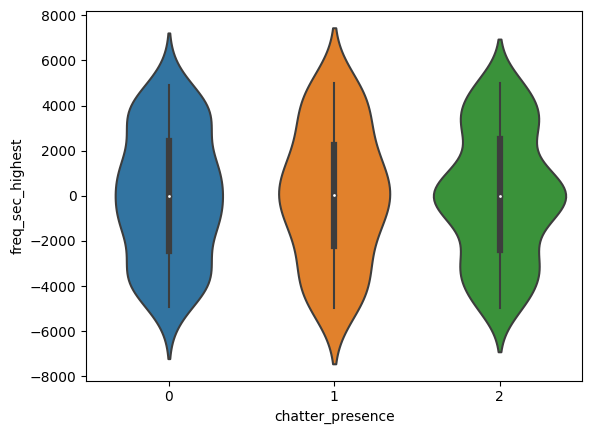

In [205]:
sns.violinplot(data=dataframe, x='chatter_presence', y='freq_sec_highest')

# Treating data

In [206]:
# dataframe = pd.get_dummies(dataframe, columns=['chatter_presence'], drop_first=True)
# dataframe.head(1)


In [207]:
# dataframe["chatter_presence_s"] = dataframe["chatter_presence_s"].astype('bool')
# dataframe.dtypes

In [208]:
# y = dataframe['chatter_presence_s']
# x = dataframe.copy().drop(['Experiment', 'chatter_presence_s'], axis="columns", inplace=False)
# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

In [209]:
y = dataframe['cluster']
x = dataframe.copy().drop(['Experiment', 'cluster'], axis="columns", inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

# Models

In [210]:
lreg = LinearRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
classifier_linear = SVC(kernel = 'linear', random_state = 0) # SVM
classifier_rbf = SVC(kernel = 'rbf', random_state = 0) # SVM

## Linear Regression

In [211]:
lreg.fit(x_train, y_train)

LinearRegression()

In [212]:
lreg_pred = lreg.predict(x_test)

In [213]:
r2_linear = r2_score(y_test, lreg_pred)
r2_linear

0.6589577723443987

## Random Forest


In [214]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [215]:
rf_pred = rf.predict(x_test)

In [216]:
acc_rf = accuracy_score(y_test, rf_pred)
acc_rf

0.9863013698630136

### GridSearchCV

In [217]:
params_rf = { 
    'n_estimators': [5, 10, 15, 30, 40, 50],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8, 9, 10, 11],
    "min_samples_split": [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 7, 9, 11],
    'criterion' :['poisson', 'gini', 'squared_error', 'absolute_error', 'friedman_mse']
}

In [218]:
CV_rf = GridSearchCV(estimator=rf, param_grid=params_rf, cv= 5)

In [219]:
CV_rf.fit(x_train, y_train)
# clear_output()

/home/naju/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/naju/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/naju/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['poisson', 'gini', 'squared_error',
                                       'absolute_error', 'friedman_mse'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 4, 7, 9, 11],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 15, 30, 40, 50]})

In [220]:
CV_rf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 15}

In [221]:
CV_rf.best_score_

1.0

'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 30

In [222]:
params_rf_grid = {'criterion': ['gini'],
 'max_depth': [4],
 'max_features': ['auto'],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'n_estimators': [15]}

In [223]:
CV_rf_grid = GridSearchCV(estimator=rf, param_grid=params_rf_grid, cv= 5)

In [224]:
CV_rf_grid.fit(x_train, y_train)

/home/naju/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/naju/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/naju/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [4],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [15]})

In [225]:
rf_pred_grid = CV_rf_grid.best_estimator_.predict(x_test)

In [226]:
acc_rf_grid = accuracy_score(y_test, rf_pred_grid)
acc_rf_grid

0.9863013698630136

## Decision Tree

In [227]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [228]:
dt_pred = dt.predict(x_test)

In [229]:
acc_dt = accuracy_score(y_test, dt_pred)
acc_dt

0.9863013698630136

### GridSearchCV

In [230]:
dt_params = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(3,80), 
    'min_samples_leaf': range(1,15),
    'max_leaf_nodes': range(1,50),
} #[3,5,8,15,30,40,50,60, 80]

In [231]:
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(x_train, y_train)

/home/naju/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10780 fits failed out of a total of 528220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10780 fits failed with the following error:
Traceback (most recent call last):
  File "/home/naju/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/naju/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/home/naju/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/home/naju/.local/lib/python3.10/site-pac

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 80),
                         'max_leaf_nodes': range(1, 50),
                         'min_samples_leaf': range(1, 15)})

In [232]:
print(dt_grid.best_estimator_)
print(dt_grid.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=2)
1.0


In [233]:
dt_grid.best_estimator_.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=2)

In [234]:
dt_pred_grid = dt_grid.best_estimator_.predict(x_test)

In [235]:
acc_dt_grid = accuracy_score(y_test, dt_pred_grid)
acc_dt_grid

0.9863013698630136

## KNN

In [236]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [237]:
knn_pred = knn.predict(x_test)

In [238]:
acc_knn = accuracy_score(y_test, knn_pred)
acc_knn

0.9178082191780822

### GridSearch

In [239]:
params = {
    'n_neighbors': range(1, 51),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [240]:
knn_grid = GridSearchCV(KNeighborsClassifier(), params, cv=11, scoring='accuracy')
knn_grid.fit(x_train, y_train)


GridSearchCV(cv=11, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [241]:
print(knn_grid.best_estimator_)
print(knn_grid.best_score_)

KNeighborsClassifier(metric='manhattan', n_neighbors=28, weights='distance')
0.9724164724164726


In [242]:
knn_grid.best_estimator_.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=28, weights='distance')

In [243]:
knn_grid_pred = knn_grid.predict(x_test)

In [244]:
acc_knn_grid = accuracy_score(y_test, knn_grid_pred)
acc_knn_grid

0.9315068493150684

## SVM

### Linear

In [245]:
classifier_linear.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [246]:
svm_linear_pred = classifier_linear.predict(x_test)

In [247]:
acc_svm_linear = accuracy_score(y_test, svm_linear_pred)
acc_svm_linear
# acc_svm_linear = 0.8809523809523809

0.9863013698630136

#### GridSearchCV Linear SVM


In [248]:
params_svm_linear = {'C': [0.1, 1, 10, 100, 1000], # 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], # 
              'kernel': ['linear']} 

In [249]:
classifier_linear_grid = GridSearchCV(classifier_linear, params_svm_linear, refit = True, verbose = 3)


In [250]:
classifier_linear_grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(estimator=SVC(kernel='linear', random_state=0),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [251]:
print(classifier_linear_grid.best_estimator_) # C=0.1, gamma=1, kernel='linear', random_state=0
print(classifier_linear_grid.best_score_)

SVC(C=0.1, gamma=1, kernel='linear', random_state=0)
1.0


In [252]:
classifier_linear_grid.best_estimator_.fit(x_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear', random_state=0)

In [253]:
pred_svm_linear_grid = classifier_linear_grid.predict(x_test)

In [254]:
acc_svm_linear_grid = accuracy_score(y_test, pred_svm_linear_grid)
# acc_svm_linear_grid = 0.8968253968253969

### rbf

In [255]:
classifier_rbf.fit(x_train, y_train)

SVC(random_state=0)

In [256]:
svm_rbf_pred = classifier_rbf.predict(x_test)

In [257]:
acc_svm_rbf = accuracy_score(y_test, svm_rbf_pred)
acc_svm_rbf

0.9452054794520548

#### GridSearchCV rbf

In [258]:
from sklearn.model_selection import StratifiedShuffleSplit

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
classifier_rbf_grid = GridSearchCV(classifier_rbf, param_grid=param_grid, cv=cv)
classifier_rbf_grid.fit(x_train, y_train)


# acc_svm_rbf_grid = grid.best_score_
# print(
#     "The best parameters are %s with a score of %0.5f"
#     % (grid.best_params_, grid.best_score_)
# )

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=SVC(random_state=0),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                         'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [259]:
print(classifier_rbf_grid.best_estimator_)
print(classifier_rbf_grid.best_score_)

SVC(C=10000.0, gamma=1e-09, random_state=0)
0.9966101694915255


In [260]:
classifier_rbf_grid.best_estimator_.fit(x_train, y_train)

SVC(C=10000.0, gamma=1e-09, random_state=0)

In [261]:
pred_svm_rbf_grid = classifier_rbf_grid.predict(x_test)

In [262]:
acc_svm_rbf_grid = accuracy_score(y_test, pred_svm_rbf_grid)

In [263]:
# acc_svm_rbf_grid = 0.8297

The best parameters are {'C': 1000000.0, 'gamma': 1e-08} with a score of 0.83

# Model results

In [264]:
results = pd.DataFrame(
    np.array([[acc_svm_linear, acc_svm_linear_grid, acc_svm_rbf, acc_svm_rbf_grid,               acc_rf,          acc_dt,         acc_dt_grid,                acc_knn,  acc_knn_grid]]),
    columns=['svm_linear',    'svm_linear_gridsearch',    'svm_rbf',   'svm_rbf_gridsearch',    'random_forest', 'decision_tree', 'decision_tree_gridsearch', 'knn',    'knn_grid'],
    index=['accuracy_score']
)

In [265]:
results.round(4)

,svm_linear,svm_linear_gridsearch,svm_rbf,svm_rbf_gridsearch,random_forest,decision_tree,decision_tree_gridsearch,knn,knn_grid
accuracy_score,0.9863,0.9863,0.9452,1.0,0.9863,0.9863,0.9863,0.9178,0.9315


In [267]:
results.to_csv('kmeans_results.csv')
